In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, dctn
from python_code.nord_cmap import * # import the custom colormap
from typing import Iterable, Callable
from utils import *
from tqdm import tqdm


This is small for wave lengths small compared with the deformation radius, so in that case
the water Ievel is approximately undisturbed as in the case of vorticity waves.
It is not so easy to reconstruct the model equations for a Rossby wave. An extensive
discussion is given by Gill (1982) or Pedlosky (1979). They conclude that departures
from geostrophic equilibrium are important for the dynamics. The potential-vorticity
equation is derived including local acceleration terms (4.32c below). Next, if the length
scales are limited (as indicated above), the momentum equations can be simplified to a
local geostrophic equilibrium. Tagether this constitutes the approximate system of
equations for Rossby waves.

$$
\begin{align*}
-fv + g \frac{\partial h}{\partial x} &=& 0 \\
fu + g \frac{\partial h}{\partial y} &=& 0 \\
\beta \frac{v}{a} + g \frac{\partial q}{\partial t} &=& 0 \\
\end{align*}
$$

With $q = \frac{1}{a}(\frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}) - \frac{fh}{a^2}$

$a$ is the water depth, $h$ the surface level, $u$ the x component of the velocity and $v$ the y one. Finally $q$ defines the potential vortity and $\beta$ is involved in the lattitude dependance of $f = f_0 + \beta y $

# I. SIMPLE CASE

## 1. rectangular plane with no slip Dirichlet condition

This case is relevant for closed boundaries with no slip at the boundaries. This leads to the following system :

$$
\begin{cases}
-fv + g \frac{\partial h}{\partial x} &=& 0 \\
fu + g \frac{\partial h}{\partial y} &=& 0 \\
\beta \frac{v}{a} + g \frac{\partial}{\partial t}(\frac{1}{a}(\frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}) - \frac{fh}{a^2}) &=& 0 \\
\end{cases}
$$

Then we got : 

$$
\begin{equation}
\begin{cases}\tag{I.1.1}

v  = \frac{g}{f} \frac{\partial h}{\partial x}\\
u  = -\frac{g}{f}\frac{\partial h}{\partial y}\\
\beta \frac{\partial h}{\partial x} +  \frac{\partial}{\partial t}(g(\frac{\partial^2 h}{\partial x^2} + \frac{\partial^2 h}{\partial y^2}) - \frac{f^2}{a}h) = 0 \\
\end{cases}
\end{equation}

$$

Using Leap-Frog time inegration scheme and semi Spectral method we got the following equation on $h_i$ knowing h sufficiently smooth: 

$$

\begin{equation}
\tag{I.1.2}
\Delta h_{i+1} - \frac{f^2}{ga} h_{i+1} =  \Delta h_{i-1} -\frac{f^2}{ga}h_{i-1} - 2\frac{\beta}{g} \frac{\partial h_i}{\partial x}\Delta t
 
\end{equation}
$$

At each integration step we got the value of the $$\Delta h_{i+1} - \frac{f^2}{ga} h_{i+1} = C.$$ We then propose to solve the ellpitic differential equation at each step to get the value of  $ h_{i+1}$. Next we solve the following equation : 
$$
\begin{equation} \tag{I.1.3}
(A -\Gamma)U = B
\end{equation}
$$
with 

$$
\begin{equation} \tag{I.1.3}
\Gamma = \begin{pmatrix}\Gamma_1&0\\0&\Gamma_2&\ddots\\&\ddots&\ddots&\ddots\\&&\ddots&\Gamma_{N-2}&0\\&&&0& \Gamma_{N-1}\end{pmatrix}
\end{equation}
$$

with $\Gamma_j = \frac{f(x_i. y_j)a}{g}$ of size N-2

And A define as the laplacian matrix 
$$
A=-\frac{1}{h^2}\begin{pmatrix}C&I_{N-1}\\I_{N-1}&C&\ddots\\&\ddots&\ddots&\ddots\\&&\ddots&C&I_{N-1}\\&&&I_{N-1}&C\end{pmatrix}
$$
with $I_{N-1}$ the identity matrix of order $N-1$ and $C$ the tridiagonal matrix of order $N-1$ defined by
$$
C=\begin{pmatrix}-4&1&0&\dots&\dots&0\\1&-4&-1&\ddots&&\vdots\\0&\ddots&\ddots&\ddots&\ddots&\vdots\\\vdots&\ddots&\ddots&\ddots&\ddots&0\\\vdots&&\ddots&1&-4&1\\0&\dots&\dots&0&1&-4\end{pmatrix},
$$
the other blocks being zero.


To satisfy the CFL Condition we propose the following grid parameter, with two different grids a spectral one for interpolationof derivative and a more traditional one. 

 * $\Delta t = $

 * $\Delta x,y = $



In [2]:
a = -1 ; b = 1

Thanks to *Numerical simulation of Rossby wave in shallow water* 

by Wen-Yih Sun Oliver M. Sun

We got the following initial conditions for solitary Rossby waves

$$\begin{equation}
\begin{cases} \tag{I.2.1}
u_o(x,y) &= \zeta(x,y) \frac{-9+ 6y^2 }{4}\exp(-0.5y^2) \\
v_o(x,y) &= 2y \frac{\partial \zeta}{\partial x}\exp{-0.5y^2} \\
h_o(x,y) &= \zeta(x,y) \frac{3+ 6y^2 }{4}\exp(-0.5y^2) \\
\end{cases}
\end{equation}
$$

with $\zeta(x,y) =  0.772 B^2 \text{sech}^2(Bx)$ and $\frac{\partial \zeta}{\partial x} =  2 B \tanh(B x) \zeta(x,y)$

In [5]:
N = 64
mesh_spectral = np.cos(np.mgrid[0:N,0:N]/(N-1) * np.pi)
mesh_finite = np.mgrid[-N + 1:N:2,-N + 1 :N:2]/(N-1)


In [4]:
def zeta(x,y):
    
    return .02 * 5 ** 2 * 1/np.cosh(5 * x) ** 2

def u_0(x,y):
    
    return zeta(x,y) * (-9 + 400 * y ** 2) / 4 * np.exp(-20 * y ** 2)

def v_0(x,y):
    
    return 4 * y  * 5  *  zeta(x,y) * np.tanh(5 * x) * np.exp(-20 * y ** 2)

def h_0(x,y):
    
    return zeta(x,y) * (3 + 400* y ** 2) / 4 * np.exp(-20 * y ** 2)

Text(0.5, 1.0, 'Initial height')

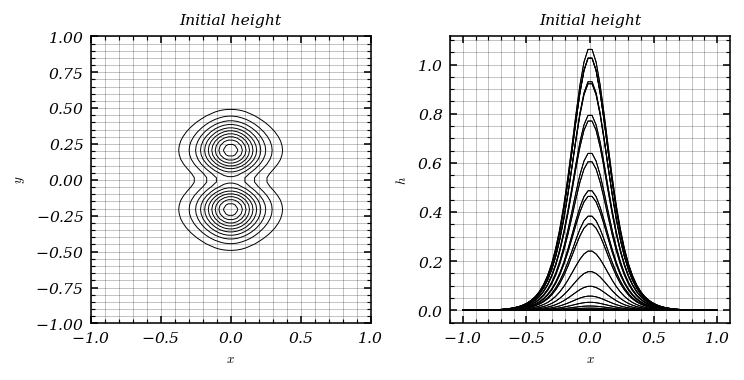

In [5]:
fig, ax = plt.subplots(1,2,figsize = (5.2,2.6))
ax[0].contour(*mesh_finite, h_0(*mesh_finite), levels = 10, colors = 'k', linewidths = .5)
ax[0].grid(which = 'both', alpha = .3)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_title('Initial height', fontweight = 30)

ax[1].plot(mesh_finite[0], h_0(*mesh_finite), color = 'k', linewidth = .5)
ax[1].grid(which = 'both', alpha = .3)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$h$')
ax[1].set_title('Initial height', fontweight = 30)

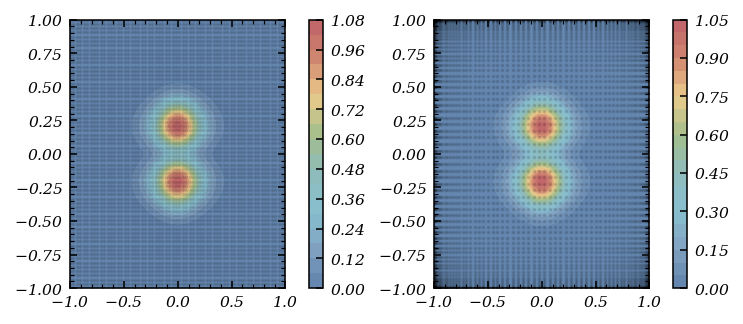

In [6]:
fig, ax = plt.subplots(1,2,figsize = (5.2,2.2))
cs1 = ax[0].contourf(*mesh_finite, h_0(*mesh_finite), levels = 20, cmap = cmap1, norm = None)
ax[0].scatter(*mesh_finite, s = 1, color = 'k', alpha = .1)
cs2 = ax[1].contourf(*mesh_spectral, grids_transfer(mesh_finite, mesh_spectral, h_0(*mesh_finite)), levels = 20, cmap = cmap1, norm = None)
ax[1].scatter(*mesh_spectral, s = 1, color = 'k', alpha = .1)
plt.colorbar(cs1)
plt.colorbar(cs2)

In [7]:
def integrate(initial_data : Iterable, mesh_spectral, mesh_finite, T : float= 3.0, Delta_t : float = 10 ** (-3),  g  : float = 1, 
              beta : float = .01, a : float = 1) : 
    """
    integrate _description_

    Parameters
    ----------
    u0 : Iterable
        _description_
    mesh : _type_
        _description_
    T : int, optional
        _description_, by default 10
    Delta_t : _type_, optional
        _description_, by default 10**(-3)

    Returns
    -------
    _type_
        _description_

    Raises
    ------  
    Exception
        _description_
    """    
    num_sample = int(T / Delta_t) + 1
    U,V,H = np.zeros((3, num_sample, N, N), dtype = np.float32)
    H[0] = initial_data[-1]
    
    # Euler Explicit for the first step
    
    f = (beta * mesh_finite[1])
    factor_1 = f ** 2 / (g * a) # see equation I.1.2
    factor_2 = beta / g * Delta_t # see equation I.1.2
    
    # interpolation on finite grids to spectral grids
    
    h_1_spectral = grids_transfer(mesh_finite, mesh_spectral, H[0])
    spectral_coeffs = compute_dct_coeff(h_1_spectral) 


    gradient_h = compute_gradient_values_with_DCT(mesh_finite, spectral_coeffs)     
    
    C =  - factor_2 * gradient_h[0]   
    
    A = spA(N-1) 
    
    Gamma = np.diagflat(np.ravel([[factor_1[0, k]] * (N-2) for k in range(1,N-1)]))
    
    H[1] = finite_difference_2D(A, C, Gamma, -1, 1) + H[0]
    

    H[1][:,[0,-1]] = H[0][:,[0,-1]]
    H[1][[0,-1],:] = H[0][[0,-1],:]
    
    for k in tqdm(range(2,num_sample), desc = 'Solving shallow water equations using semi Spectral method') : 
        
        H[k] = leap_frog(Delta_t, mesh_spectral, mesh_finite, H[k-2], H[k-1], A, Gamma, g = g, beta = beta, a = a)

    return H

In [8]:
initial_data = [u_0(*mesh_finite), v_0(*mesh_finite), h_0(*mesh_finite)]


In [9]:
H = integrate(initial_data, mesh_spectral, mesh_finite, T = 3, Delta_t = 10 ** (-3),  g  = 1, beta = .01, a = 1)

/home/andrea/anaconda3/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
Solving shallow water equations using semi Spectral method: 100%|██████████| 2999/2999 [20:29<00:00,  2.44it/s]


In [11]:
np.save('./rossby_wave.npy', H)

In [2]:
H = np.load('./rossby_wave.npy')

In [3]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

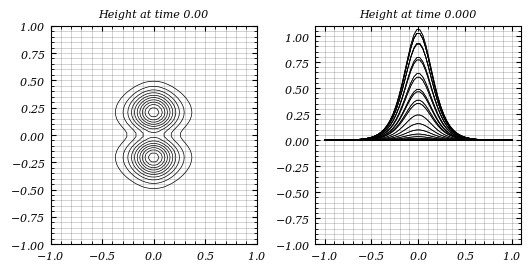

In [17]:
n = 0
fig, ax = plt.subplots(1,2,figsize = (5.2,2.6), dpi = 100)

ax[0].grid(which = 'both', alpha = .3)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_title('Initial height', fontweight = 30)

ax[1].grid(which = 'both', alpha = .3)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$h$')

ax[1].set_title('Initial height', fontweight = 30)

plot_1 = ax[0].contour(*mesh_finite,H[0], levels = 10, colors = 'k', linewidths = .5)

def animate(i) : 
    j = i * 30
    
    ax[0].cla()
    ax[1].cla()
    ax[1].set_ylim(-1,1.1)
    ax[0].grid(which = 'both', alpha = .3)
    ax[1].grid(which = 'both', alpha = .3)

    ax[0].contour(*mesh_finite,H[j], levels = 10, colors = 'k', linewidths = .5)
    ax[1].plot(mesh_finite[0], H[j], color = 'k', linewidth = .5)
    ax[0].set_title(f'Height at time {j * 100 ** (-3):.2f}', fontweight = 30)
    ax[1].set_title(f'Height at time {j * 100 ** (-3):.3f}', fontweight = 30)

ani = FuncAnimation(fig, animate, frames = len(H) // 30, interval = 10, repeat = False)
HTML(ani.to_jshtml())
    

## 2. rectangular plane with no shear stress Neumann condition


# II. GRIDS & METHODS 

### 1.CURVILINEAR GRIDS

In [ ]:
def generate_random_curvilinear_grids(N : int, c : float  = .2) -> np.ndarray : 
    
    """
    generate_random_curvilinear_grids generate a random curvilnear grids of size N x N 

    Parameters
    ----------
    N : int
        Size of the matrix
    c : float, optional
        overlapping parameter, by default .2

    Returns
    -------
    np.ndarray
        _description_
    """    
    eps,nu = np.cos(np.mgrid[0:N,0:N] / N * np.pi)
    
    # Defining the curvilnear coordinates
    
    x = eps + c * np.sin(np.pi * eps) * np.sin(np.pi * nu)
    y = nu + c * np.sin(np.pi * eps) * np.sin(np.pi * nu)
    
    return x,y

NameError: name 'np' is not defined

In [ ]:
def u(x,y) : return np.sin(x**2 -  y**2)

In [ ]:
def compute_dct_coeff(mesh : Iterable) -> np.ndarray :
    """
    compute_dct_coeff  compute dct coeff for a 2D mesh

    Parameters
    ----------
    mesh : Iterable
        _description_

    Returns
    -------
    np.ndarray
        _description_
    """
                                                  
    coeffs = dctn(mesh,  type = 1, norm = 'forward')  
    coeffs[1:-1:,1:-1] = 2 * coeffs[1:-1:,1:-1]

    return coeffs

NameError: name 'Iterable' is not defined

In [ ]:
def interpolant_chebyshev(x : Iterable,y : Iterable,  set_coefficients : Iterable) -> np.ndarray: 
    """
    interpolant_chebyshev compute the interpolant of a function given its chebyshev coefficients

    Parameters
    ----------
    x : Iterable
        _description_
    y : Iterable
        _description_
    set_coefficients : Iterable
        _description_

    Returns
    -------
    np.ndarray
        _description_
    """    
    return np.polynomial.chebyshev.chebval2d(x ,y, set_coefficients)

[Text(0, -1.0, ''),
 Text(0, -0.5, ''),
 Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, '')]

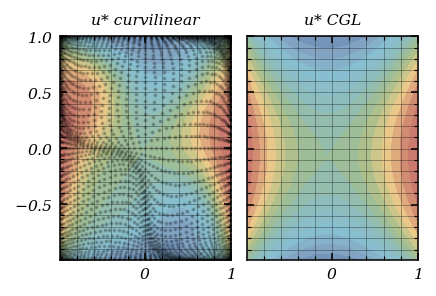

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (3,2))

N = 32

mesh_curvilinear = generate_random_curvilinear_grids(50, c = .25)
mesh_CGL = np.cos(np.mgrid[0:N,0:N]/N * np.pi)

ax[0].contourf(*mesh_curvilinear, interpolant_chebyshev(*mesh_curvilinear, compute_dct_coeff(u(*mesh_curvilinear))),levels = 15, cmap = cmap1)
ax[0].scatter(*mesh_curvilinear,s = 1, color = 'k',  alpha = .2)

ax[1].contourf(*mesh_CGL, interpolant_chebyshev(*mesh_CGL, compute_dct_coeff(u(*mesh_CGL))),levels = 15, cmap = cmap1)

ax[0].set_title('u* curvilinear')
ax[1].set_title('u* CGL')

ax[0].grid(which = 'both', alpha = .4)
ax[1].grid(which = 'both', alpha = .4)

ax[1].set_yticklabels([])

SPHERICAL HARMONICS